1Q. Prepare a prediction model for profit of 50_startups data..
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

##  Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

##  Import data

In [3]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [66]:
new_data = data.rename({'R&D Spend' :'RDS','Administration':'ADMN','Marketing Spend':'MRS','Profit': 'profit'},axis =1)
input_data =new_data.drop(columns =['State','profit'])
input_data
output_data =new_data[['profit']]
print(input_data)
print(output_data)

          RDS       ADMN        MRS
0   165349.20  136897.80  471784.10
1   162597.70  151377.59  443898.53
2   153441.51  101145.55  407934.54
3   144372.41  118671.85  383199.62
4   142107.34   91391.77  366168.42
5   131876.90   99814.71  362861.36
6   134615.46  147198.87  127716.82
7   130298.13  145530.06  323876.68
8   120542.52  148718.95  311613.29
9   123334.88  108679.17  304981.62
10  101913.08  110594.11  229160.95
11  100671.96   91790.61  249744.55
12   93863.75  127320.38  249839.44
13   91992.39  135495.07  252664.93
14  119943.24  156547.42  256512.92
15  114523.61  122616.84  261776.23
16   78013.11  121597.55  264346.06
17   94657.16  145077.58  282574.31
18   91749.16  114175.79  294919.57
19   86419.70  153514.11       0.00
20   76253.86  113867.30  298664.47
21   78389.47  153773.43  299737.29
22   73994.56  122782.75  303319.26
23   67532.53  105751.03  304768.73
24   77044.01   99281.34  140574.81
25   64664.71  139553.16  137962.62
26   75328.87  144135.98  13

##  Data  Understanding

### Intial Analysis

In [5]:
new_data.shape # rows and columns

(50, 5)

In [6]:
new_data.isnull().sum() # no null values

RDS       0
ADMN      0
MRS       0
State     0
profit    0
dtype: int64

In [7]:
new_data.dtypes # all data types

RDS       float64
ADMN      float64
MRS       float64
State      object
profit    float64
dtype: object

In [8]:
new_data.describe()

,RDS,ADMN,MRS,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Assumptions Check

####  Normality Test

 we should find the normality check with distplot or histogram

<AxesSubplot:xlabel='RDS', ylabel='Density'>

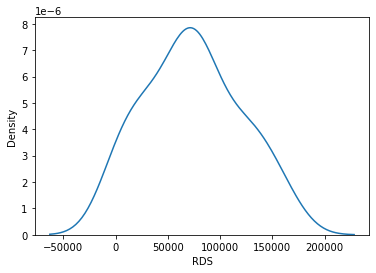

In [9]:
sns.distplot(a = new_data['RDS'],hist = False)

In [10]:
new_data['RDS'].skew()

0.164002172321177

In [11]:
new_data['RDS'].kurtosis()

-0.7614645568424674

<AxesSubplot:xlabel='ADMN', ylabel='Density'>

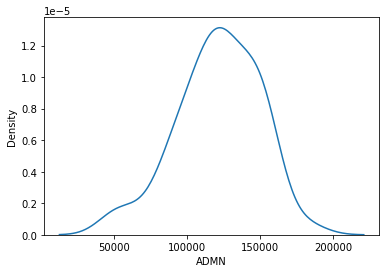

In [12]:
sns.distplot(a = new_data['ADMN'],hist = False)

In [13]:
new_data['ADMN'].skew()

-0.4890248099671768

In [14]:
new_data['ADMN'].kurtosis()

0.22507113536865386

<AxesSubplot:xlabel='MRS', ylabel='Density'>

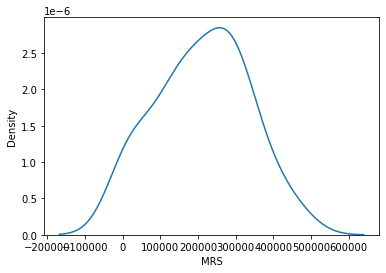

In [15]:
sns.distplot(a = new_data['MRS'],hist = False)

In [16]:
new_data['MRS'].skew()

-0.04647226758360412

In [17]:
new_data['MRS'].kurtosis()

-0.6717011281297514

### Normality test to probplot

In [18]:
from scipy import stats

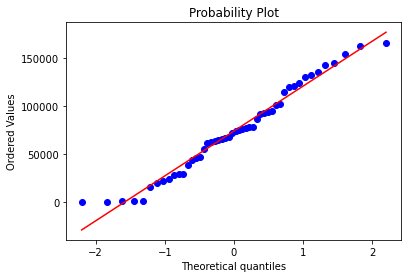

In [19]:
stats.probplot(x=new_data['RDS'],dist='norm',plot=plt)
plt.show()  

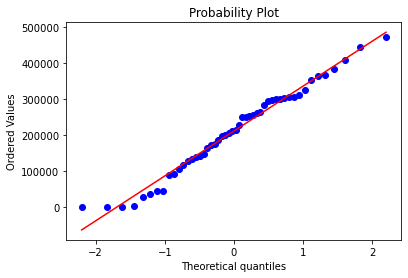

In [20]:
stats.probplot(x=new_data['MRS'],dist='norm',plot=plt)
plt.show()  

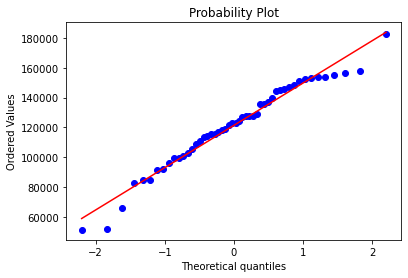

In [21]:
stats.probplot(x=new_data['ADMN'],dist='norm',plot=plt)
plt.show()  

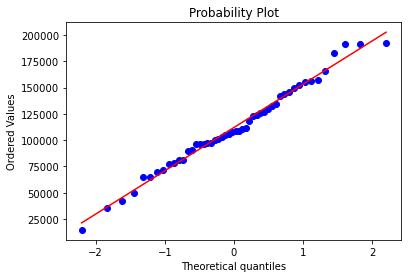

In [22]:
stats.probplot(x=new_data['profit'],dist='norm',plot=plt)
plt.show()  

**here the normality test performed with two different plots and found few distortions. To clear all that I need to use tranformations techniques.
** coming to dist plot their is skewness and kurtosis found
** coming to probplot all the dots are not on line.

### Linearity Test

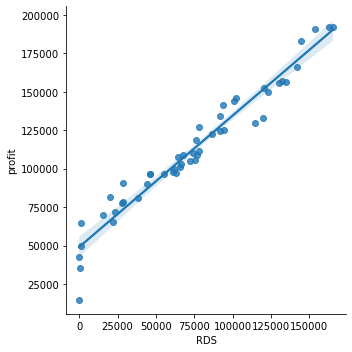

In [23]:
sns.lmplot(x ='RDS',y='profit', data = new_data)

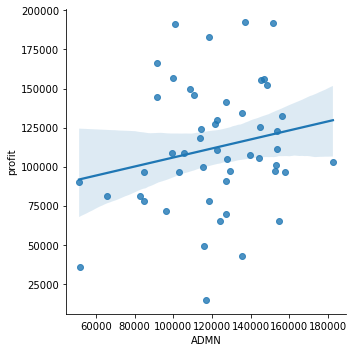

In [24]:
sns.lmplot(x ='ADMN',y='profit', data = new_data)

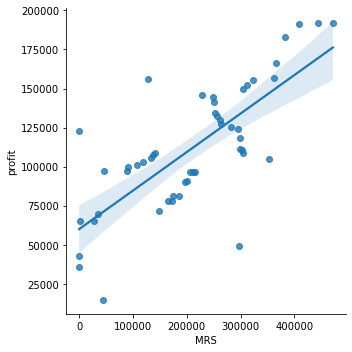

In [25]:
sns.lmplot(x ='MRS',y='profit', data = new_data)

## ===Linearity Test Failed ====

## Multi collinearity Test 

In [26]:
data_corr = input_data.corr().round(2) # correlation must be check between inputs only 

In [27]:
data_corr

,RDS,ADMN,MRS
RDS,1.00,0.24,0.72
ADMN,0.24,1.00,-0.03
MRS,0.72,-0.03,1.00


<AxesSubplot:>

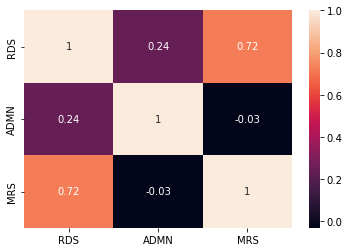

In [28]:
sns.heatmap(data_corr,annot = True) 

## MODEL BUILDING || MODEL TRAINING

## Model optimization and finding better predictions with r square value

In [29]:
import statsmodels.formula.api as smf
import numpy as np

In [30]:
model = smf.ols(formula ='profit~RDS+ADMN+MRS',data =new_data).fit()

In [31]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMN            -0.026816
MRS              0.027228
dtype: float64

In [32]:
model.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
ADMN         6.017551e-01
MRS          1.047168e-01
dtype: float64

In [33]:
model.tvalues

Intercept     7.626218
RDS          17.846374
ADMN         -0.525507
MRS           1.655077
dtype: float64

In [34]:
model_1 = smf.ols(formula ='profit~RDS',data =new_data).fit()
print('R-squared :',round(model_1.rsquared,4))
print('Adjusted R-squared :',round(model_1.rsquared_adj,4))
print('AIC:',round(model_1.aic,4))
print('BIC:',round(model_1.bic,4))

R-squared : 0.9465
Adjusted R-squared : 0.9454
AIC: 1058.873
BIC: 1062.6971


In [35]:
model_2 = smf.ols(formula ='profit~RDS+ADMN',data =new_data).fit()
print('R-squared :',round(model_2.rsquared,4))
print('Adjusted R-squared :',round(model_2.rsquared_adj,4))
print('AIC:',round(model_2.aic,4))
print('BIC:',round(model_2.bic,4))

R-squared : 0.9478
Adjusted R-squared : 0.9456
AIC: 1059.6637
BIC: 1065.3998


In [36]:
model_3 = smf.ols(formula ='profit~RDS+ADMN+MRS',data =new_data).fit()
print('R-squared :',round(model_3.rsquared,4))
print('Adjusted R-squared :',round(model_3.rsquared_adj,4))
print('AIC:',round(model_3.aic,4))
print('BIC:',round(model_3.bic,4))

R-squared : 0.9507
Adjusted R-squared : 0.9475
AIC: 1058.7715
BIC: 1066.4196


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_model =LinearRegression()

In [47]:
linear_model.fit(input_data,output_data)

LinearRegression()

In [49]:
linear_model.intercept_

array([50122.19298987])

In [52]:
linear_model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

##  MODEL TESTING

In [75]:
output_pred = linear_model.predict(input_data)

In [108]:
output_pred # predicted data


array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

In [62]:
output_data   # given data

,profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


##  MODEL EVALUATION 

In [63]:
Error = output_data - output_pred

In [65]:
Error

,profit
0,-259.422890
1,2635.291768
2,8903.110904
3,9205.289974
4,-5951.574183
5,-6589.660571
6,-1991.586669
7,-4268.763048
8,470.070301
9,-5124.724110


## HOMOSCEDASTICITY TEST

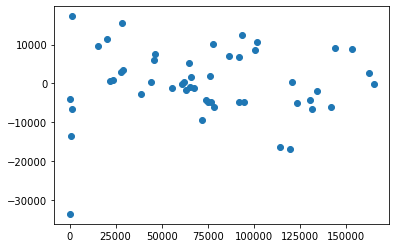

In [72]:
plt.scatter(x =input_data['RDS'],y=Error)

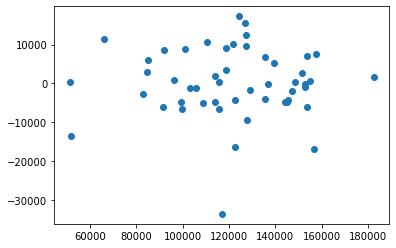

In [73]:
plt.scatter(x =input_data['ADMN'],y=Error)

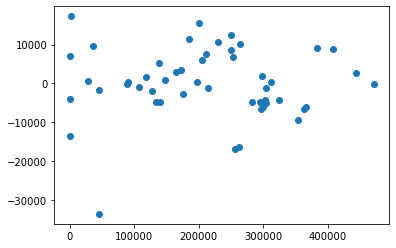

In [118]:
plt.scatter(x =input_data['MRS'],y=Error)

### ZERO RESIDUAL MEAN TEST

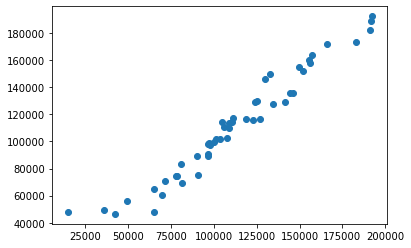

In [76]:
plt.scatter(x =output_data,y=output_pred)

In [109]:
df= pd.DataFrame({'output_data':[192261.83,191792.06,191050.39,182901.99,166187.94],'output_pred':[192521.25289008,189156.76823227,182147.2790962 ,173696.70002553, 172139.51418327]})
df  # these are the first five predicted outputs and comparing both the given profit(output) and predicted output

,output_data,output_pred
0,192261.83,192521.252890
1,191792.06,189156.768232
2,191050.39,182147.279096
3,182901.99,173696.700026
4,166187.94,172139.514183


In [92]:
from sklearn.metrics import r2_score
r2_score(output_data,output_pred)

0.9507459940683246

### ========================================================================================

2Q Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
 

###  Import Data

In [121]:
details = pd.read_csv("ToyotaCorolla.csv",encoding=('ISO-8859-1'))

In [127]:
new_details= details[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax',]]
new_details

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,13500,23,46986,90,2000,3,5,210
1,13750,23,72937,90,2000,3,5,210
2,13950,24,41711,90,2000,3,5,210
3,14950,26,48000,90,2000,3,5,210
4,13750,30,38500,90,2000,3,5,210
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69
1432,10845,72,19000,86,1300,3,5,69
1433,8500,71,17016,86,1300,3,5,69
1434,7250,70,16916,86,1300,3,5,69


## DATA UNDERSTANDING

In [139]:
new_details.shape

(1436, 8)

In [126]:
new_details.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
dtype: int64

In [137]:
X = new_details.drop(columns ='Price')
Y = details[['Price']]

In [143]:
X

,age,km,hp,cc,doors,gears,tax
0,23,46986,90,2000,3,5,210
1,23,72937,90,2000,3,5,210
2,24,41711,90,2000,3,5,210
3,26,48000,90,2000,3,5,210
4,30,38500,90,2000,3,5,210
...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69
1432,72,19000,86,1300,3,5,69
1433,71,17016,86,1300,3,5,69
1434,70,16916,86,1300,3,5,69


In [138]:
Y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [142]:
X= X.rename({'Age_08_04':'age','KM': 'km','HP':'hp','cc':'cc','Doors':'doors','Gears':'gears','Quarterly_Tax':'tax'},axis =1)

### Assumptions check

#### Normality Check

In [140]:
from scipy import stats

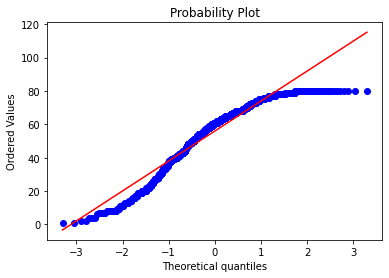

In [154]:
stats.probplot(x=X['age'],dist='norm',plot=plt)
plt.show()

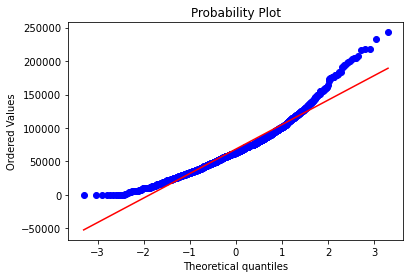

In [155]:
stats.probplot(x=X['km'],dist='norm',plot=plt)
plt.show()

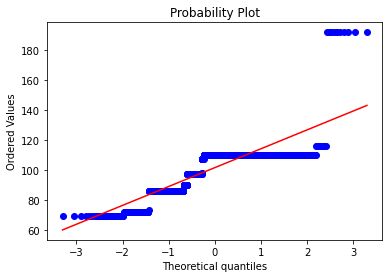

In [156]:
stats.probplot(x=X['hp'],dist='norm',plot=plt)
plt.show()

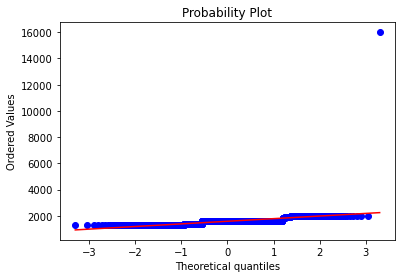

In [157]:
stats.probplot(x=X['cc'],dist='norm',plot=plt)
plt.show()

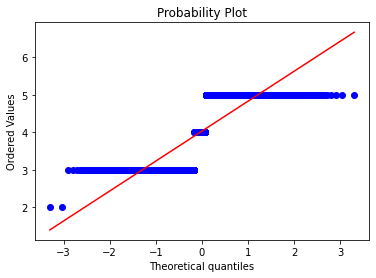

In [158]:
stats.probplot(x=X['doors'],dist='norm',plot=plt)
plt.show()

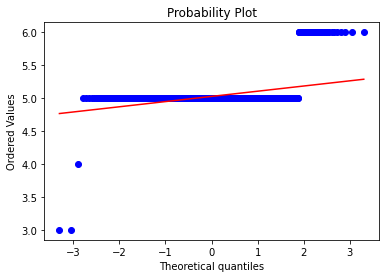

In [159]:
stats.probplot(x=X['gears'],dist='norm',plot=plt)
plt.show()

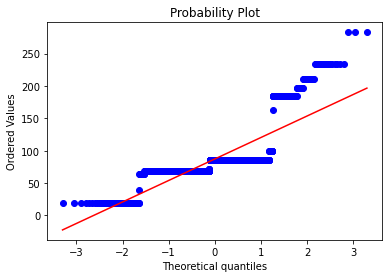

In [160]:
stats.probplot(x=X['tax'],dist='norm',plot=plt)
plt.show()

In [161]:
X.skew()

age      -0.826702
km        1.015912
hp        0.955836
cc       27.431793
doors    -0.076395
gears     2.283960
tax       1.993834
dtype: float64

In [162]:
Y.kurtosis()

Price    3.737781
dtype: float64

## MODEL BUILDING || MODEL TRAINING

In [163]:
from sklearn.linear_model import LinearRegression

In [200]:
lin_model =LinearRegression()
lin_model.fit(X,Y)

LinearRegression()

In [198]:
lin_model.intercept_

array([9980.65868171])

In [167]:
lin_model.coef_

array([[-1.36385511e+02, -2.00763524e-02,  4.35742800e+01,
         1.06625996e-01,  1.57948288e+02,  6.20143248e+02,
         1.61981045e+01]])

In [173]:
Y_pred =lin_model.predict(X)

In [169]:
Y_pred

array([[17011.5846919 ],
       [16490.58327157],
       [16981.10193983],
       ...,
       [ 8533.90039483],
       [ 8672.2935409 ],
       [ 8777.33384373]])

###  MODEL EVALUATION

In [170]:
error = Y- Y_pred

In [171]:
error

,Price
0,-3511.584692
1,-2740.583272
2,-3031.101940
3,-1632.070738
4,-2477.254042
...,...
1431,-1235.842045
1432,2487.316599
1433,-33.900395
1434,-1422.293541


#### Homoscedasticity check

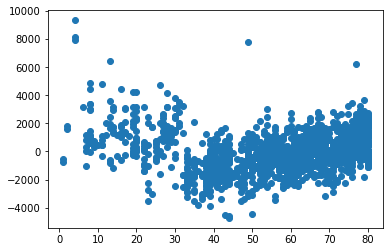

In [174]:
plt.scatter(x=X['age'], y = error)

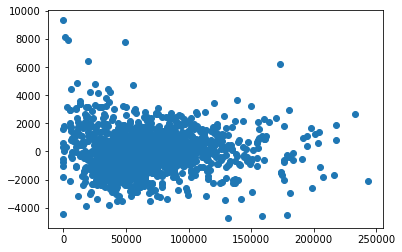

In [176]:
plt.scatter(x=X['km'], y = error)

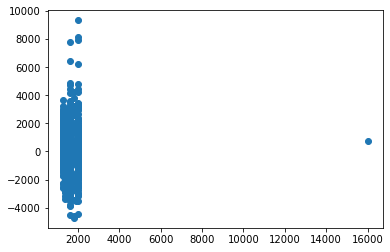

In [178]:
plt.scatter(x=X['cc'], y = error)

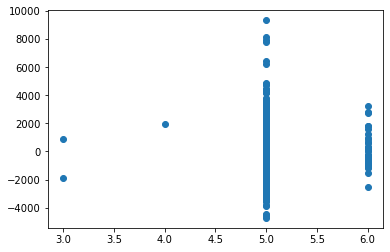

In [179]:
plt.scatter(x=X['gears'], y = error)

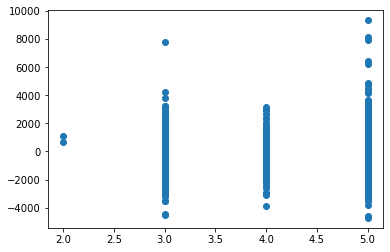

In [180]:
plt.scatter(x=X['doors'], y = error)

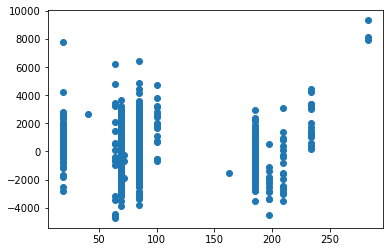

In [181]:
plt.scatter(x=X['tax'], y = error)

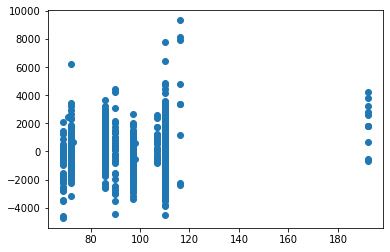

In [183]:
plt.scatter(x=X['hp'], y = error)

### Zero Residual Mean Test

Text(0.5, 1.0, 'Actual output vs Predicted output')

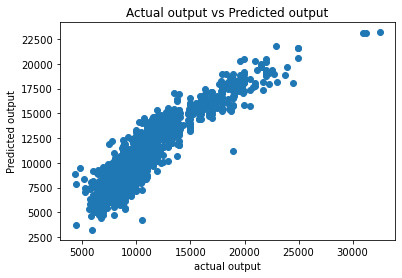

In [197]:
plt.scatter(x=Y,y=Y_pred,)
plt.xlabel('actual output')
plt.ylabel('Predicted output')
plt.title('Actual output vs Predicted output')
#actual output vs Predicted output

In [190]:
Y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [191]:
Y_pred

array([[17011.5846919 ],
       [16490.58327157],
       [16981.10193983],
       ...,
       [ 8533.90039483],
       [ 8672.2935409 ],
       [ 8777.33384373]])

In [195]:
from sklearn.metrics import r2_score
r2_score(Y,Y_pred)                         

0.8396879765183245

### =======================================================================================